Before running this `data/musician-graph/` should contain a graph file and nodes files

In [59]:
import pandas as pd
import numpy as np
from utils import MusicDataLoader
from collections import Counter

loader = MusicDataLoader()
mus_nodes = loader.get_features(n_release_bins=100)



Checking the release distribution of the dataset

Who are our top 10 in terms of network rank??? 

In [60]:
mus_nodes.sort_values('network_rank',ascending=False)[:10]

,id,name,isdone,spotifyid,genres,popularity,followers,histogram,num_release,first_release,last_release,network_rank,in_edges,out_edges
746,11285,Wolfgang Amadeus Mozart,True,4NJhFmfw43RLBLjQvxDuRS,"[classical, classical era]",79.0,4473353.0,"[0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, ...",821,1950-01-01,2020-11-06,0.153125,834,834
1855,1021,Ludwig van Beethoven,True,2wOqMjp9TyABvtHdOSOTUS,"[classical, classical era, early romantic era,...",76.0,4323890.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",857,1918-01-01,2020-12-11,0.146233,737,737
3215,12181,Johannes Brahms,True,5wTAi7QkpP6kp8a54lmTOq,"[classical, german romanticism, late romantic ...",68.0,783577.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",359,1917-01-01,2020-11-06,0.135927,609,609
1848,2327,Johann Sebastian Bach,True,5aIqB5nVVvmFsvSdExz408,"[baroque, classical, early music, german baroque]",81.0,3558511.0,"[0, 1, 2, 4, 4, 6, 8, 8, 8, 8, 9, 11, 11, 13, ...",742,1956-03-01,2020-11-13,0.128443,741,741
1851,12438,Franz Schubert,True,2p0UyoPfYfI76PCStuXfOP,"[classical, classical era, early romantic era]",68.0,916434.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",277,1927-01-01,2020-10-02,0.121309,549,549
3210,122653,Пётр Ильич Чайковский,True,3MKCzCnpzw3TjUYs2v7vDA,"[classical, late romantic era, russian romanti...",73.0,1113879.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",411,1926-01-01,2019-12-06,0.119846,492,492
1849,32513,Robert Schumann,True,2UqjDAXnDxejEyE0CzfUrZ,"[classical, early romantic era, german romanti...",65.0,476303.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, ...",162,1960-01-01,2020-11-06,0.118596,489,489
3207,10211,Maurice Ravel,True,17hR0sYHpx7VYTMRfFUOmY,"[classical, impressionism, neoclassicism, post...",64.0,409760.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, ...",179,1947-01-01,2019-02-01,0.114774,449,449
2721,12299,London Symphony Orchestra,True,5yxyJsFanEAuwSM5kOuZKc,"[british orchestra, classical, classical perfo...",76.0,241664.0,"[0, 2, 4, 4, 7, 7, 9, 11, 12, 12, 12, 14, 14, ...",404,1957-01-01,2020-09-04,0.113760,462,462
3248,10729,Antonín Dvořák,True,6n7nd5iceYpXVwcx8VPpxF,"[classical, czech classical, late romantic era]",63.0,475066.0,"[0, 2, 2, 2, 3, 3, 3, 3, 7, 8, 8, 9, 9, 10, 11...",238,1954-01-01,2020-08-07,0.112431,429,429


What about top 10 after excluding classical?

In [61]:
keywords = ['classic','romantic','orchestra','choir','violin','orchest','и']
is_classic = lambda x: any([k in str(x).lower() for k in keywords])
# name_not_classic = lambda x: not any([k in str(x) for x in ])
mus_nodes[~mus_nodes.genres.apply(is_classic) & ~mus_nodes.name.apply(is_classic) & (mus_nodes.popularity > 50) ].sort_values('network_rank',ascending=False)

# mus_nodes.sort_values('network_rank',ascending=False)[:10].genres.apply(lambda x: (set(x)&set(keywords)))

,id,name,isdone,spotifyid,genres,popularity,followers,histogram,num_release,first_release,last_release,network_rank,in_edges,out_edges
1392,43566,Engelbert Humperdinck,True,17XXKfRBMCWvLrqGoNkJXm,"[adult standards, brill building pop, easy lis...",63.0,453483.0,"[0, 1, 1, 2, 2, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, ...",36,1967-09-01,2017-11-24,0.014172,42,42
3927,255454,George Malcolm,True,5ccyh1kIfmtUfJf4d5wchx,[harpsichord],51.0,967.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6,1969-01-01,2018-01-01,0.011772,33,33
2165,4473,Benny Goodman,True,1pBuKaLHJlIlqYxQQaflve,"[adult standards, big band, jazz, jazz clarine...",55.0,317213.0,"[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",97,1928-01-01,2007-05-22,0.011746,31,31
135,236,Elton John,True,3PhoLpVuITZKcymswpck5b,"[glam rock, mellow gold, piano rock]",88.0,8837538.0,"[0, 4, 6, 6, 10, 11, 16, 16, 17, 18, 20, 21, 2...",250,1970-01-01,2020-10-09,0.009876,45,45
3857,2230,Chick Corea,True,5olDKSsFhhmwh8UCWwKtpq,"[contemporary jazz, contemporary post-bop, ecm...",55.0,288561.0,"[0, 3, 4, 4, 4, 4, 4, 4, 6, 6, 9, 9, 10, 10, 1...",118,1968-01-01,2019-10-04,0.006127,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,924800,Cherub,True,00dwwnz3V4kRfu3UFYpJLz,[],60.0,148352.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2013-12-10,2013-12-10,NaN,0,0
12831,520,MxPx,True,1cSpfa4Un4NCOzeOKgGtG9,"[christian punk, pop punk, punk, ska punk, ska...",54.0,206987.0,"[0, 1, 1, 1, 3, 3, 4, 4, 7, 7, 7, 8, 11, 11, 1...",50,1994-01-01,2019-07-02,NaN,0,0
12882,405252,The Gaslight Anthem,True,7If8DXZN7mlGdQkLE2FaMo,"[heartland rock, new jersey hardcore, new jers...",57.0,312274.0,"[0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, ...",28,2007-01-01,2014-08-12,NaN,0,0
12891,1604681,Rosalie.,True,65RQbLHJIWPfWwxYJ5a5BZ,"[polish alternative, polish electronica, polis...",55.0,17041.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2020-03-19,2020-03-19,NaN,0,0


Even after we try to cut out all classical artists, it seems that majority is dominated by instrumental artists. Probably for providing samples

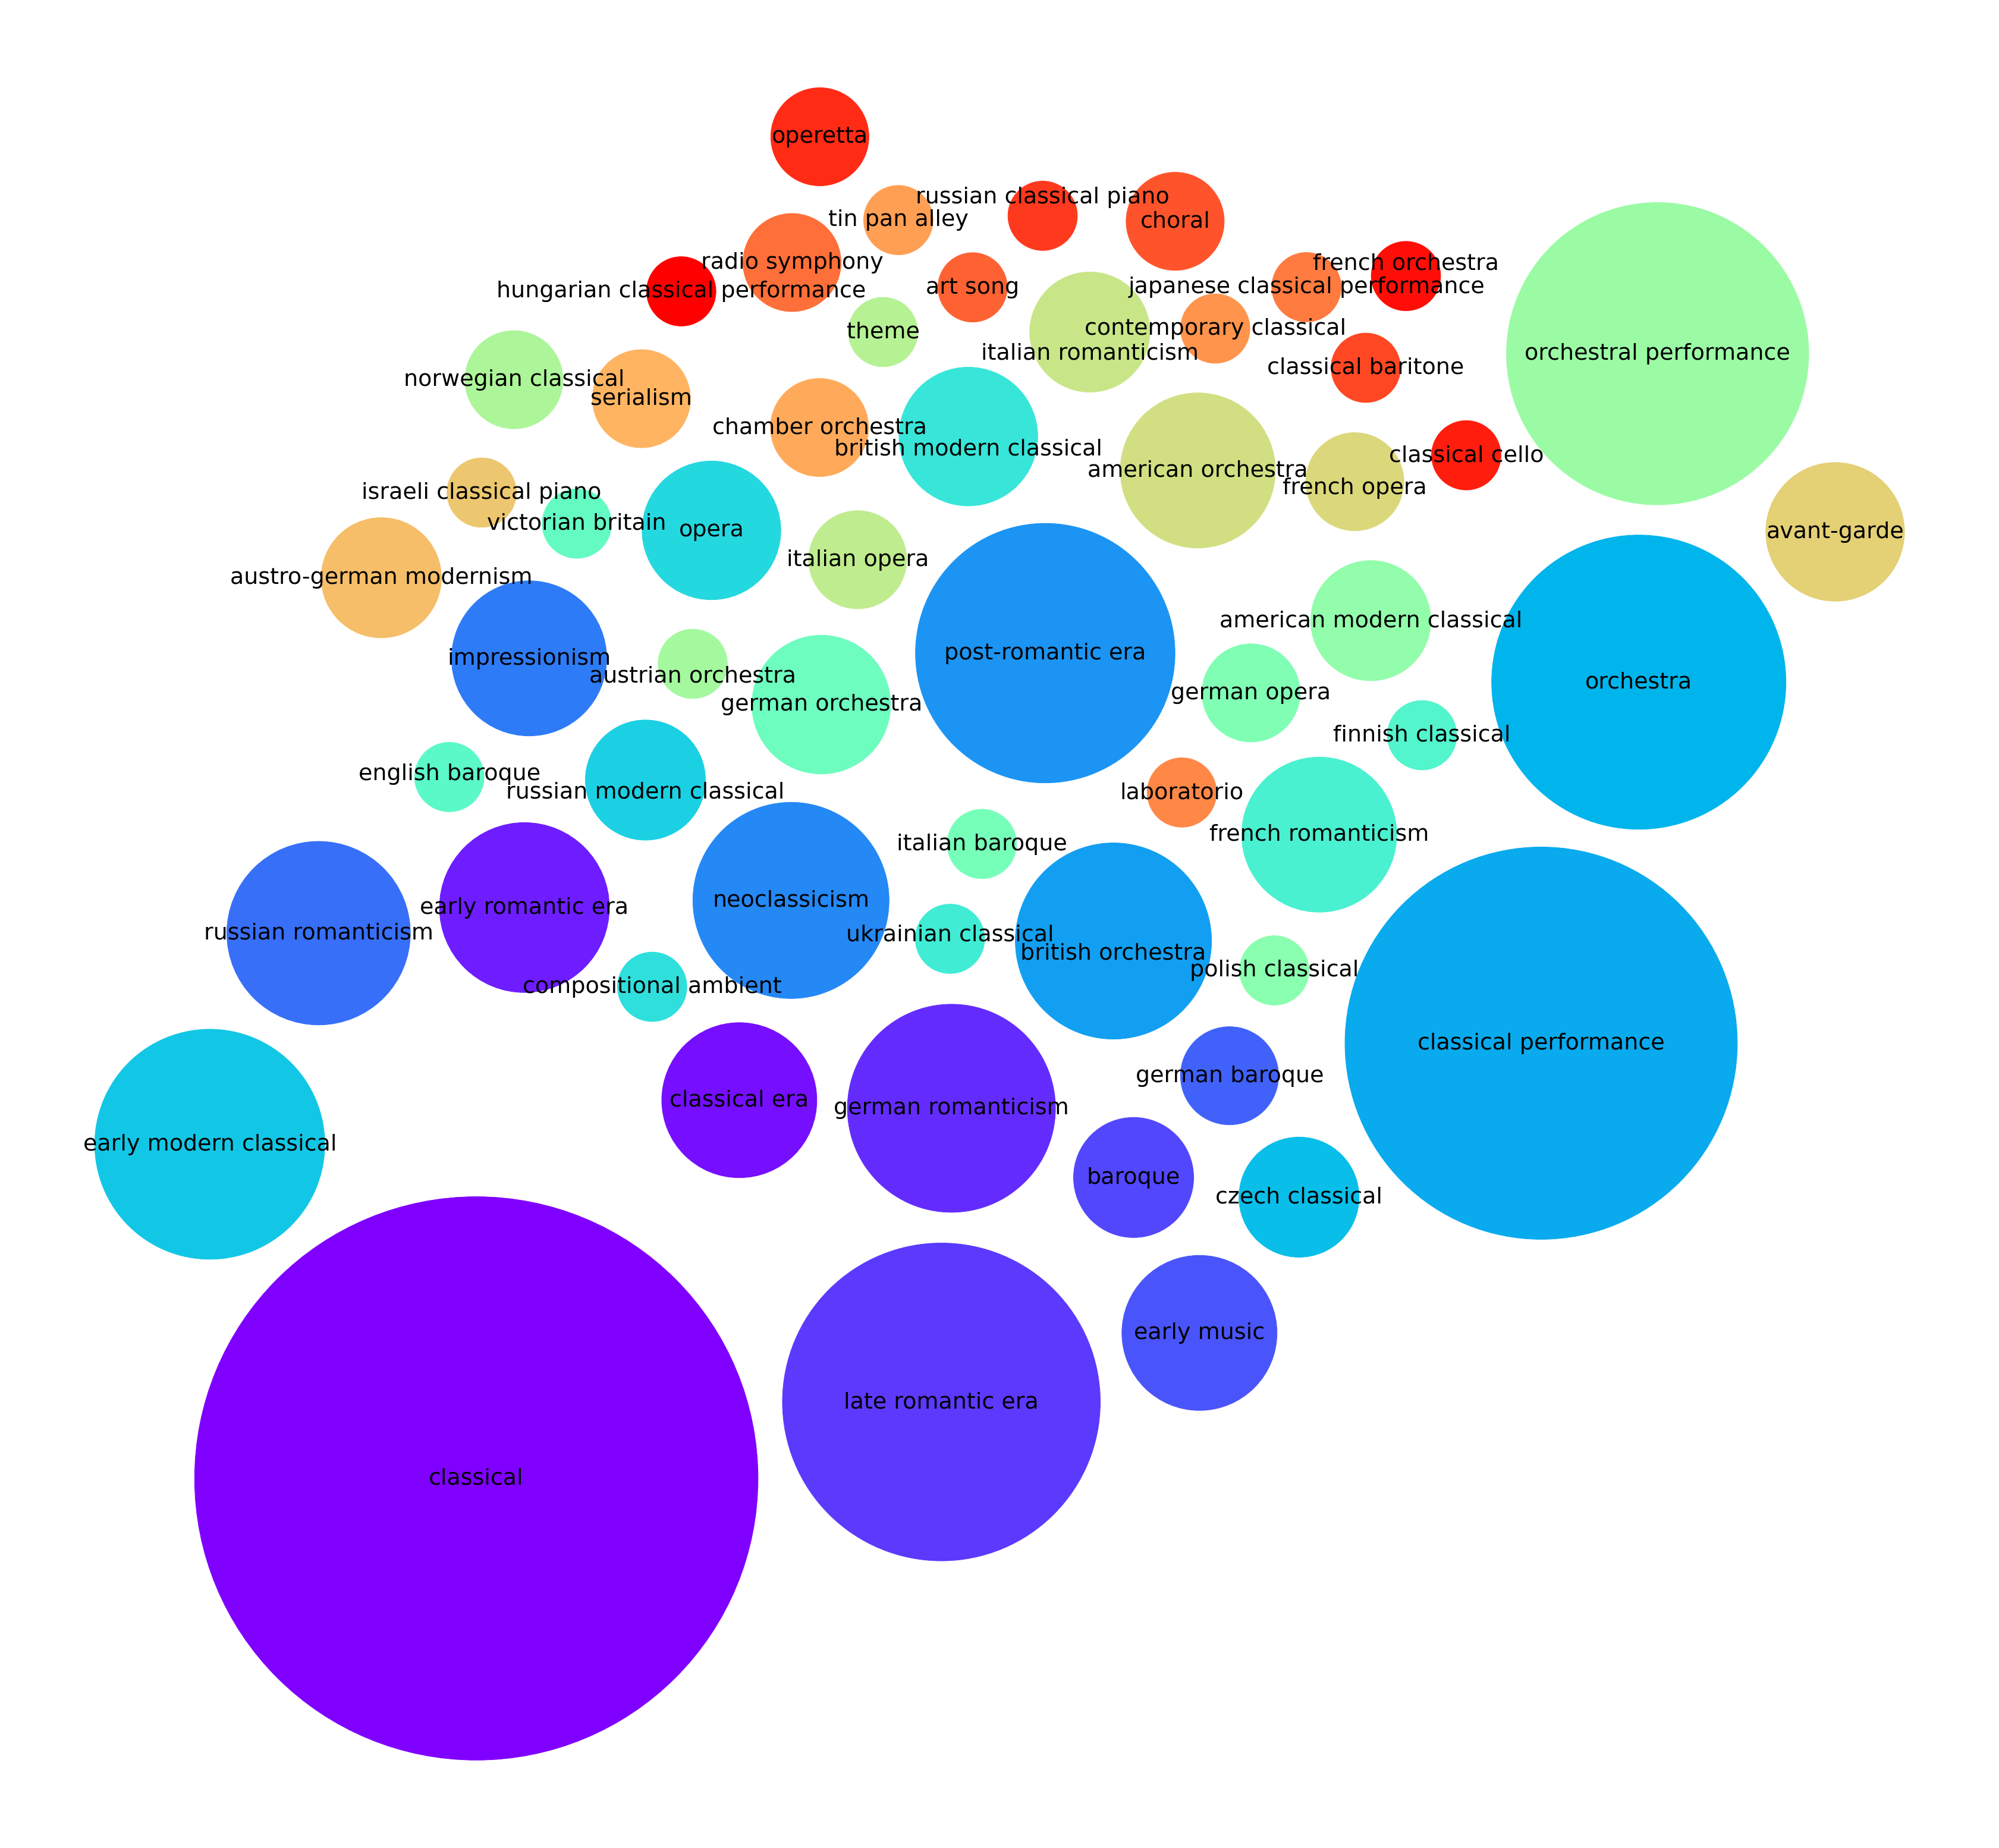

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from utils.BubbleChart import BubbleChart

plt.rcParams.update({'font.size': 38})

flatten = lambda x: [xxx for xx in x for xxx in xx]

genre_df = pd.DataFrame(list(Counter(flatten(mus_nodes.sort_values('network_rank',ascending=False)[:100].genres.values.tolist())).items()),
             columns=['genre','num'])

find_idx = lambda x: genre_df[genre_df.genre.str.contains(x)].index.values[0]


# sns.scatterplot(data=genre_df,x='genre',y='count',size='count')
bc = BubbleChart(genre_df.num.values,bubble_spacing=0.5)

cmap = plt.cm.get_cmap('rainbow',len(genre_df))
colors = [cmap(i) for i in range(len(genre_df))]

bc.collapse()

fig, ax = plt.subplots(figsize=(60,60),
                    #    this one stays!!!!!! idk what it does but without it matplotlib murders laptop
                       subplot_kw=dict(aspect="equal"))

manual_offsets = np.zeros((len(genre_df),2))

manual_offsets[find_idx('russian classical piano')] = [0,0.3]
manual_offsets[find_idx('french orchestra')] = [0,0.2]
manual_offsets[find_idx('english baroque')] = [0,0.05]
manual_offsets[find_idx('ukrainian classi')] = [0,0.07]

manual_offsets[find_idx('british modern')] = [0,-0.2]
manual_offsets[find_idx('austrian orchestra')] = [0,-0.2]
manual_offsets[find_idx('russian modern classical')] = [0,-0.2]
manual_offsets[find_idx('british orchestra')] = [0,-0.2]
manual_offsets[find_idx('italian roman')] = [0,-0.35]
manual_offsets[find_idx('french opera')] = [0,-0.1]


bc.plot(
    ax, genre_df.genre.values, colors, manual_offsets)
ax.axis("off")
ax.relim()
ax.autoscale_view()
# ax.set_title('Genre tags of top 100 network ranks')

fig.savefig('pics/features/top100_network_genres.png')

# revert font
plt.rcParams.update(plt.rcParamsDefault)

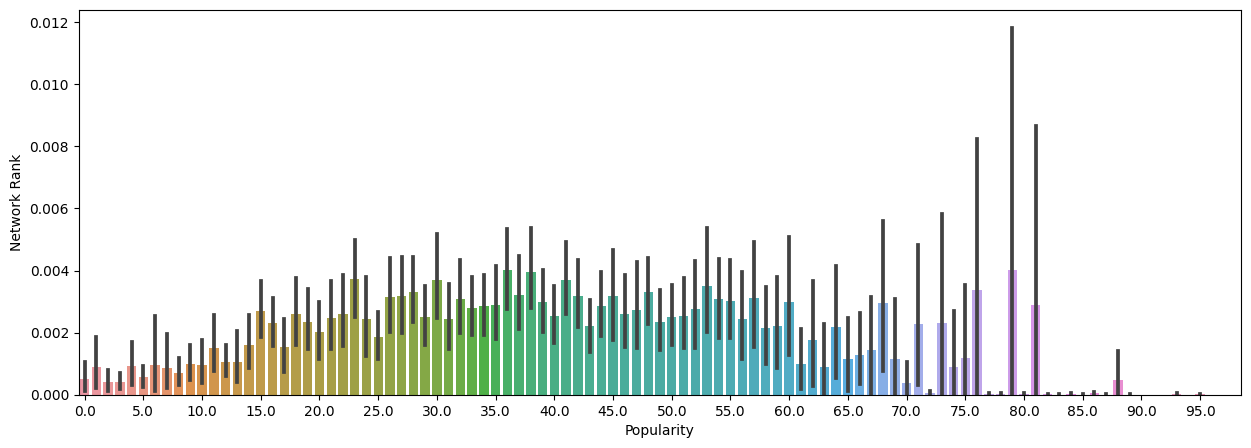

In [67]:

plt.figure(figsize=(15,5))
fig = sns.barplot(data=mus_nodes,x='popularity',y='network_rank')
fig.set(xlabel='Popularity',ylabel='Network Rank',xticks=np.arange(0,100,5))

fig.get_figure().savefig('pics/features/pop_networkrank.png',dpi=300)

### Quick glance at upper mid popularity 

<AxesSubplot:xlabel='popularity', ylabel='network_rank'>

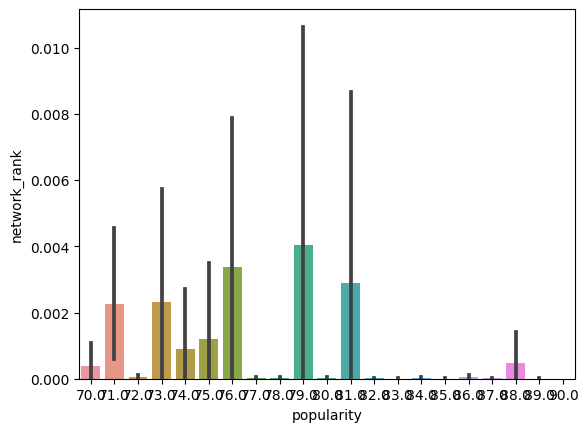

In [68]:
uppermid = mus_nodes[(mus_nodes.popularity >= 70) & (mus_nodes.popularity <= 90)]

sns.barplot(data =uppermid,x='popularity',y='network_rank')

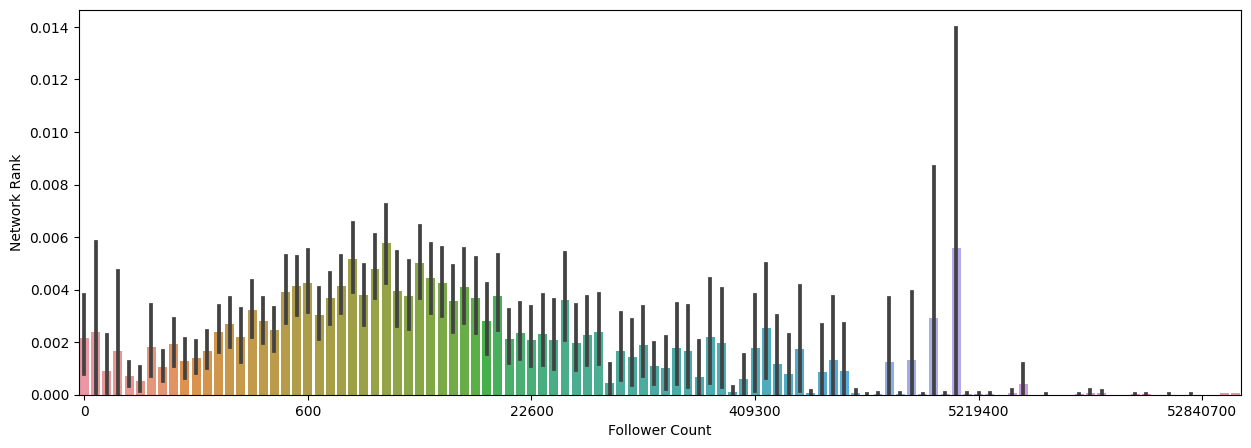

In [77]:
plt.figure(figsize=(15,5))

# gotta make separate bins for mus_nodes

mus_nodes['fol_logsqr'] = mus_nodes.followers.replace({0:1}).apply(lambda x: int(np.log(x)**1.6))

ticks = [int(np.exp(np.power(i,1/1.6)))//100 * 100 for i in np.arange(0,mus_nodes.fol_logsqr.max())]

fig = sns.barplot(data=mus_nodes,x='fol_logsqr',y='network_rank')
fig.set(xlabel='Follower Count',ylabel='Network Rank',
        # xscale='log'
        xticklabels=ticks[:-1],
        xticks=np.arange(0,mus_nodes.fol_logsqr.max(),20)
        )


fig.get_figure().savefig('pics/features/fol_networkrank.png',dpi=300)